In [221]:
'''
The data is provided by one of the client which is basically a Kaggle data set contains 
transactions made by credit cards in September 2013 by european cardholders.It contains 
only numerical input variables which are the result of a PCA transformation. 
Unfortunately, due to confidentiality issues, They cannot provide the original features 
and more background information about the data.

Let's import the dataset and see what's inside?

'''

# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [222]:
# Importing the dataset and see some records

data=pd.read_csv('creditcard.csv', sep=',')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [223]:
'''
'Time' signifies seconds elapsed between each transaction and the first transaction in the dataset. 
The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it 
takes value 1 in case of fraud and 0 otherwise.

Let's see how many records are there and what are the columns.

'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [224]:
'''
We can see there are total of total of 284807 records and 31 columns. There are no missing value 
observed in any of the columns.

There are total 31 column out of which only 3 columns namely "Time", "Amount", and 'Class' are 
meaningfully labelled and the rest are just a numerical PCA tranformed column whose meaning is 
not known to us (obviously due to privacy concern)

'''

#------------------------ EDA-Exploratory Data Analysis--------------------------------

# Lets investigate how many Normal records and how many of them are Fraud

frauds = data.loc[data['Class'] == 1]
non_frauds = data.loc[data['Class'] == 0]

print("We have", len(frauds), "fraud data points and", len(non_frauds), "nonfraudulent data points.")

We have 492 fraud data points and 284315 nonfraudulent data points.


Text(0, 0.5, 'Frequency')

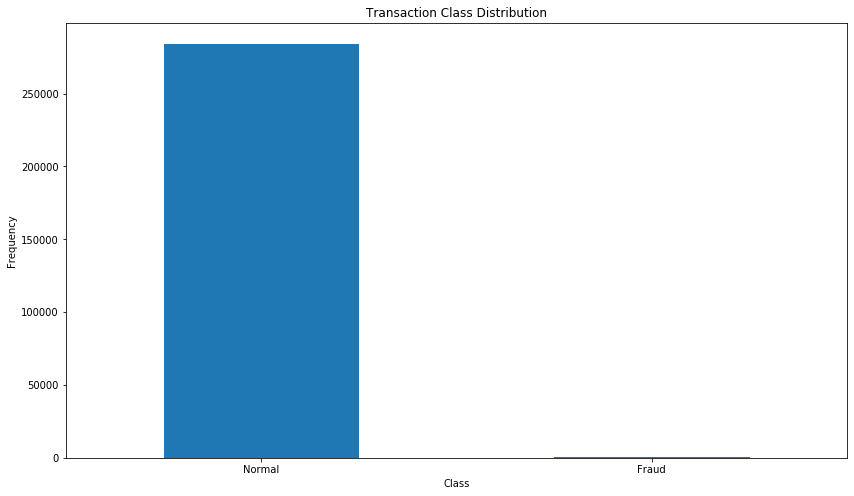

In [225]:
# Plot the result to see visually

count_classes = pd.value_counts(data['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [226]:
print("So we have only",len(frauds)/len(data)*100,"% Fraud transaction" )

So we have only 0.1727485630620034 % Fraud transaction


In [227]:
## Get the Fraud and the normal dataset 

fraud = data[data['Class']==1]
normal = data[data['Class']==0]

In [228]:
# We need to analyze more amount of information from the transaction data
# How different are the amount of money used in different transaction classes?

fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [229]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

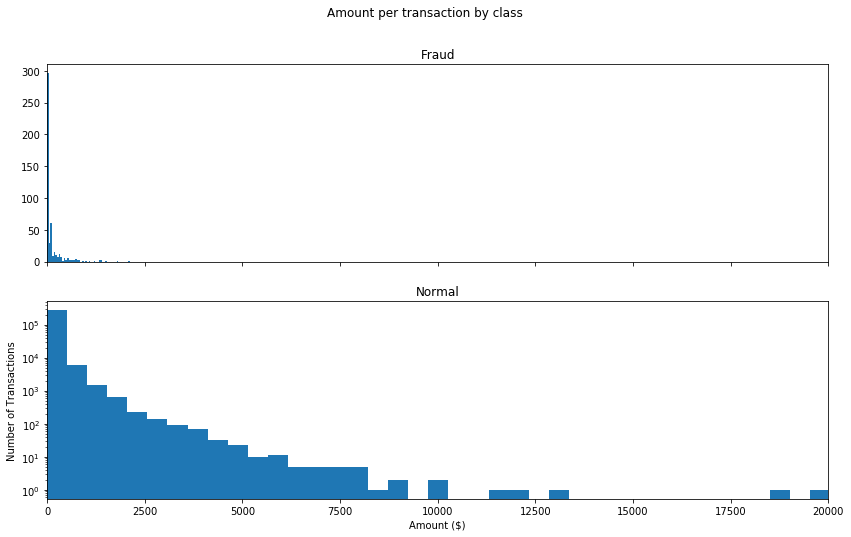

In [230]:
# Let's analyse the number of transaction per classes to observe 

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 50
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

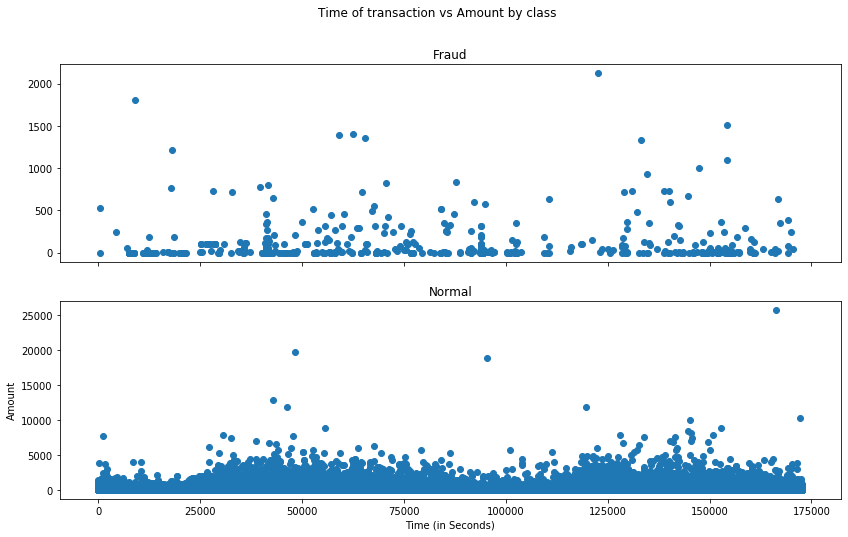

In [231]:

# We Will check Do fraudulent transactions occur more often during certain time frame ? 
# Let us find out with a visual representation.

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [232]:
'''
Still we donot have much idea about fraudlent transaction while analyzing both time and amount known field. 
So let's apply PCA for feature extraction so that we could get the best features upon which we can 
carry out our analysis.

'''

#---------------------------Model Building--------------------------------#

#------------------------Data preprocessing-------------------------------#


# Creating dependent and independent features

X = data.iloc[:, :-1].values
y = data.iloc[:, 30:31].values


# --------Feature Scaling-------------------------------------

# As we know every columns are already scaled except for the Time and Amount. 
# So, let's do it so:

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

data['Amount']=sc.fit_transform(data['Amount'].values.reshape(-1,1))
data['Time']=sc.fit_transform(data['Time'].values.reshape(-1,1))

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [234]:
'''
Before applying PCA we should get to know how many features we are going to feed the PCA algorithm. To know this we should try 
find the amount of variance each column contributing 

'''
# Checking variance contribution

from sklearn.decomposition import PCA
pca=PCA(n_components= None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

# See the variance contribution
pd.DataFrame(explained_variance)


,0
0,9.999731e-01
1,2.684115e-05
2,1.650288e-09
3,1.065618e-09
4,8.891389e-10
5,8.375246e-10
6,7.965188e-10
7,7.152443e-10
8,6.549152e-10
9,5.429003e-10


In [220]:
# So we can see that the variance contribution is also evenly distributed. We can see here, 
# 16 features giving us 80% variance
#  which is enough for analysis
print(sum(explained_variance[0:15])*100,"% variance")

79.70521284953446 % variance


In [214]:
# Applying PCA

from sklearn.decomposition import PCA
pca = PCA(n_components =16)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.020238,-0.156630,0.942752,-1.345886,-0.045961,-2.244445,-0.330122,-0.711434,-0.133388,0.593691,0.225645,-0.844407,0.469087,-0.585015,0.074376,0.958095
1,-2.220708,0.564946,1.674845,-0.250796,0.513100,0.146798,-0.172949,0.246568,0.317423,-0.165194,-0.650406,0.509164,-1.729677,-0.387355,-0.395789,-0.084293
2,0.128141,-0.076034,-1.104178,0.354990,0.404161,-1.285414,-1.629577,0.964637,1.450353,-0.872699,0.741922,-0.888405,-0.293871,1.303103,-0.164459,0.019606
3,-1.175261,0.391581,-1.350414,0.213779,-0.994325,1.231662,0.860939,-0.014270,-0.291457,-0.186455,1.233328,0.517132,1.600595,-0.300532,-1.177851,-0.834347
4,1.245523,-0.951273,0.315618,-1.048014,-0.027734,0.060200,-1.446865,0.210763,-0.498793,0.293641,-1.151217,0.484285,0.531777,1.331613,-0.665626,-0.502919


In [215]:
# So,Now X_train and X_test are also 21 featured transformed data set on which we will perform RandomForest 
# classifier and Logistic regression classifier to evaluate the performance

# Fitting Logistic Regression to the Training set

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


print(cm)



[[85283    13]
 [   59    88]]


In [216]:
print("Accuracy Score :")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"% By Logistic Regression classifier")

Accuracy Score :
99.91573329588147 % By Logistic Regression classifier


In [217]:
#------------Random Forest-------------------------------------

import warnings
warnings.filterwarnings("ignore")

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, y_pred)


print(cm1)


[[85292     4]
 [   35   112]]


In [218]:
print("Accuracy Score :")
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred)*100,"% By Random Forest classifier")

Accuracy Score :
99.95435553526913 % By Random Forest classifier


In [219]:
'''
Wow This awsm improvement from logistic regression classification accuracy. We have achieved 99.95% accuracy.

'''

'\nWow This awsm improvement from logistic regression classification accuracy. We have achieved 99.95% accuracy.\n\n'